In [1]:
from kiteconnect import KiteConnect

In [2]:
import logging
import requests

In [3]:
import pandas as pd

In [4]:
from time import time, sleep

In [5]:
from datetime import datetime, timedelta

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
api_key = "f5ean4aaxq3wv9n3"
client_id = "ED5107"
api_secret = "s1kbs5y654zhbpqgd2rvslqc6shx9yh8"

In [8]:
logging.basicConfig(level=logging.DEBUG)
kite = KiteConnect(api_key=api_key)
print(kite.login_url())

https://kite.trade/connect/login?api_key=f5ean4aaxq3wv9n3&v=3


In [9]:
#r = requests.get(kite.login_url())
#redirect_link = r.url
#print(redirect_link)
#request_token = redirect_link[]

In [12]:
# Get the Request Token from the redirect URL

request_token = "hDs6oyU7H0oh1NNZ3imE8cx8wp5H1lPG"

# Get Access Token

In [13]:
data = kite.generate_session(request_token, api_secret=api_secret)
access_token = data["access_token"]
kite.set_access_token(access_token)
print(access_token)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "POST /session/token HTTP/1.1" 200 None


i69P4YjMJZ50wxtnAjUfwydHfc8q0Xvi


In [14]:
print(kite.profile())

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /user/profile HTTP/1.1" 200 None


{'user_id': 'ED5107', 'user_type': 'individual', 'email': 'ramanathannalini@gmail.com', 'user_name': 'Nalini Ramanathan', 'user_shortname': 'Nalini', 'broker': 'ZERODHA', 'exchanges': ['BSE', 'BFO', 'CDS', 'NFO', 'MF', 'NSE'], 'products': ['CNC', 'NRML', 'MIS', 'BO', 'CO'], 'order_types': ['MARKET', 'LIMIT', 'SL', 'SL-M'], 'avatar_url': '', 'meta': {'demat_consent': 'consent'}}


# NOTE:
# After every request ensure that you sleep for 0.5 second because there is a limit of a maximum of  3 requests per second.

# Placing a trade

In [15]:
def place_order(trading_symbol, exchange, qty, transaction_type, product, order_type, variety='regular',price=None,validity=None,disclosed_quantity=None,trigger_price=None,squareoff=None,stoploss=None,trailing_stoploss=None, tag=None):
    """
    Refer: https://kite.trade/docs/connect/v3/orders/
    
    tradingsymbol Eg RELIANCE, 
    exchange => ['MF', 'NSE', 'NFO', 'CDS', 'BSE', 'BFO'],
    quantity as integer,
    variety is 'regular' by default,
    transaction_type => 'BUY' or 'SELL',
    product Eg 'CNC' for Equity,
    order_type => ['MARKET', 'LIMIT', 'SL', 'SL-M'],
    price=None,
    validity=None,
    disclosed_quantity=None,
    trigger_price=None,
    squareoff=None,
    stoploss=None,
    trailing_stoploss=None,
    tag=None
    """
    order_id = kite.place_order(tradingsymbol=trading_symbol, 
                     exchange=exchange,
                     quantity=qty,
                     variety=variety,
                     transaction_type=transaction_type,
                     product=product,
                     order_type=order_type,
                     price=price,
                     validity=validity,
                     disclosed_quantity=disclosed_quantity,
                     trigger_price=trigger_price,
                     squareoff=squareoff,
                     stoploss=stoploss,
                     trailing_stoploss=trailing_stoploss,
                     tag=tag)
    return order_id

# Get Instrument Tokens

In [16]:
def get_instrument_token(tradingsymbol, instrument_type, exchange):
    instruments = pd.DataFrame(kite.instruments())
    instrument_token = instruments[(instruments['tradingsymbol']==tradingsymbol) & (instruments['instrument_type']==instrument_type) & (instruments['exchange']==exchange)]['instrument_token'].to_list()[0]
    return str(instrument_token)

# Get Historical Data

In [17]:
def get_historical_data(instrument_token, from_date, to_date, interval):
    return pd.DataFrame(kite.historical_data(instrument_token=instrument_token,
                                    from_date=from_date, 
                                   to_date=to_date,
                                   interval=interval))

# Get Simple Moving Average

In [34]:
def get_moving_average(timeseries, window):
    timeseries[str(window)+'d_EMAvg'] = timeseries.iloc[:,0].rolling(window=window).mean()
    return timeseries

# Get Exponential Moving Average

In [19]:
def get_exponential_moving_avg(timeseries, span):
    """
    adjust=False specifies that we are interested in the recursive calculation mode.
    """
    timeseries[str(span)+'d_EMAvg'] = timeseries.iloc[:,0].ewm(span=span, adjust=False).mean()
    return timeseries

# VERSION A

1. Get EMAs for current instant
2. If 8d_EMAvg > 25d_EMAvg then BUY if no position held or else hold long or else close short
3. If 8d_EMAvg = 25d_EMAvg then close whatever position is held
4. If 8d_EMAvg < 25d_EMAvg then SELL if no position held or else hold sell or else close long

In [20]:
#INSTRUMENT DATA
tradingsymbol = 'BANKNIFTY20SEPFUT'
instrument_type = 'FUT'
exchange = 'NFO'

# TRADE DETAILS
qty = 1
order_type='MARKET'
product='MIS'
variety='regular'

# CHART SPECIFICATIONS
candle_size = 'minute'
k_period = 10
k_smooth_period = 3
d_smooth_period = 3
d_period = 10

# DEPLOYMENT DURATION
deploy_till = datetime(year=2020, month=8, day=28, hour=15 , minute=30 , second=0)

# TEST TRADING PLATFORM

In [39]:
test_start = datetime(2020, 8, 14, 9, 56)
test_end = datetime(2020, 8, 14, 15, 30)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-14+09%3A56%3A00&to=2020-08-14+15%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 5755


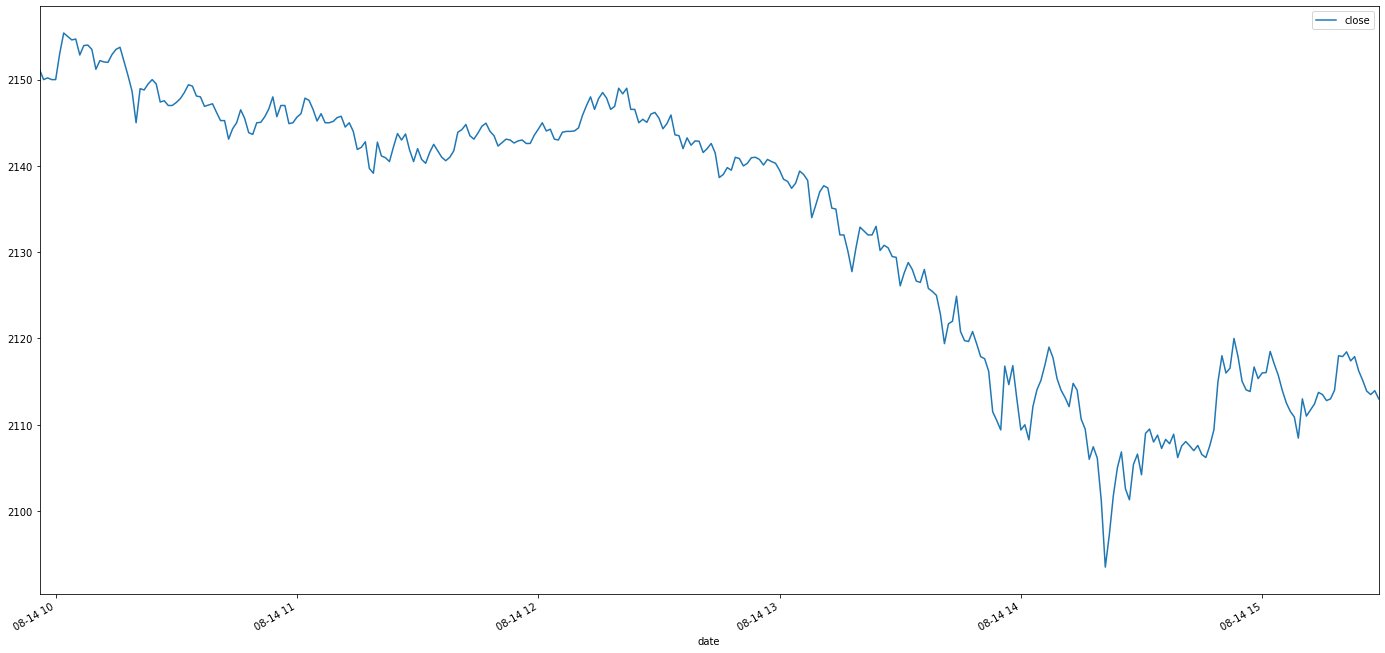

In [40]:
test_data = get_historical_data(rel_instoken, test_start, test_end, interval)[['date','close']].set_index('date', drop=True)
test_data.plot(legend=True, figsize=(24, 12))

In [19]:
def place_trade(trade_log, current_time, current_price, current_8davg, current_25davg, current_transaction_type):
    if len(trade_log)==0 or trade_log.loc[list(trade_log.index)[-1], 'status']=='closed':
        current_status = 'open'
    elif trade_log.loc[list(trade_log.index)[-1], 'status']=='open':
        current_status = 'closed'
    trade_log.loc[len(trade_log)] = [current_time, current_price, current_8davg, current_25davg, current_transaction_type, current_status]
    return trade_log, current_transaction_type, current_status

In [90]:
market_open = datetime(2020, 8, 14, 9, 56)
test_start = test_end - timedelta(days=1, hours=1)
trade_log = pd.DataFrame(columns=['time','price','8d_EMAvg','25d_EMAvg','transaction_type','status'])
current_status='closed'
for delta in range(335):
    sleep(0.5)
    test_end = market_open + timedelta(minutes=delta)
    test_start = test_end - timedelta(days=1, hours=1)
    hist_data = get_historical_data(rel_instoken, test_start, test_end, interval)
    emav_df = pd.DataFrame({'date':[datetime.strftime(d, "%Y-%m-%d %H:%M:%S") for d in list(hist_data['date'])],'price':list(hist_data['close'])}).set_index('date', drop=True)
    for window in [8, 25]:
        emav_df = get_exponential_moving_avg(emav_df, window)
    current_time = list(emav_df.index)[-1]
    current_price = emav_df.loc[current_time, 'price']
    current_8davg = emav_df.loc[current_time, '8d_EMAvg']
    current_25davg = emav_df.loc[current_time, '25d_EMAvg']
    if datetime.strftime(test_end, "%H:%M:%S")=='15:29:00':
        if current_status=='open':
            if current_transaction_type=='buy':
                transaction_type='sell'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
            if current_transaction_type=='sell':
                transaction_type='buy'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
        else:
            break
    elif current_8davg>current_25davg:
        if current_status=='closed':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            continue
        elif current_status=='open' and current_transaction_type=='sell':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
    elif current_8davg<current_25davg:
        if current_status=='closed':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='sell':
            continue

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+08%3A56%3A00&to=2020-08-14+09%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7186
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+08%3A57%3A00&to=2020-08-14+09%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7203
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+08%3A58%3A00&to=2020-08-14+09%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7218
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A22%3A00&to=2020-08-14+10%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7513
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A23%3A00&to=2020-08-14+10%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7517
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A24%3A00&to=2020-08-14+10%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7518
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A49%3A00&to=2020-08-14+10%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A50%3A00&to=2020-08-14+10%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A51%3A00&to=2020-08-14+10%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7514
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A15%3A00&to=2020-08-14+11%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7504
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A16%3A00&to=2020-08-14+11%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7509
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A17%3A00&to=2020-08-14+11%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A42%3A00&to=2020-08-14+11%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7507
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A43%3A00&to=2020-08-14+11%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A44%3A00&to=2020-08-14+11%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7499
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A08%3A00&to=2020-08-14+12%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A09%3A00&to=2020-08-14+12%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A10%3A00&to=2020-08-14+12%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A35%3A00&to=2020-08-14+12%3A35%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7520
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A36%3A00&to=2020-08-14+12%3A36%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7513
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A37%3A00&to=2020-08-14+12%3A37%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7525
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A01%3A00&to=2020-08-14+13%3A01%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A02%3A00&to=2020-08-14+13%3A02%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A03%3A00&to=2020-08-14+13%3A03%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A28%3A00&to=2020-08-14+13%3A28%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A29%3A00&to=2020-08-14+13%3A29%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A30%3A00&to=2020-08-14+13%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7476
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A54%3A00&to=2020-08-14+13%3A54%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7519
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A55%3A00&to=2020-08-14+13%3A55%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7530
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A56%3A00&to=2020-08-14+13%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7534
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A21%3A00&to=2020-08-14+14%3A21%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7571
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A22%3A00&to=2020-08-14+14%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7583
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A23%3A00&to=2020-08-14+14%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7594
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A47%3A00&to=2020-08-14+14%3A47%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7595
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A48%3A00&to=2020-08-14+14%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7589
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A49%3A00&to=2020-08-14+14%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7594
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+14%3A14%3A00&to=2020-08-14+15%3A14%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7630
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+14%3A15%3A00&to=2020-08-14+15%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7633
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+14%3A16%3A00&to=2020-08-14+15%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7637
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

In [91]:
trade_log.to_excel('Trade_Log-RUN3.xlsx')

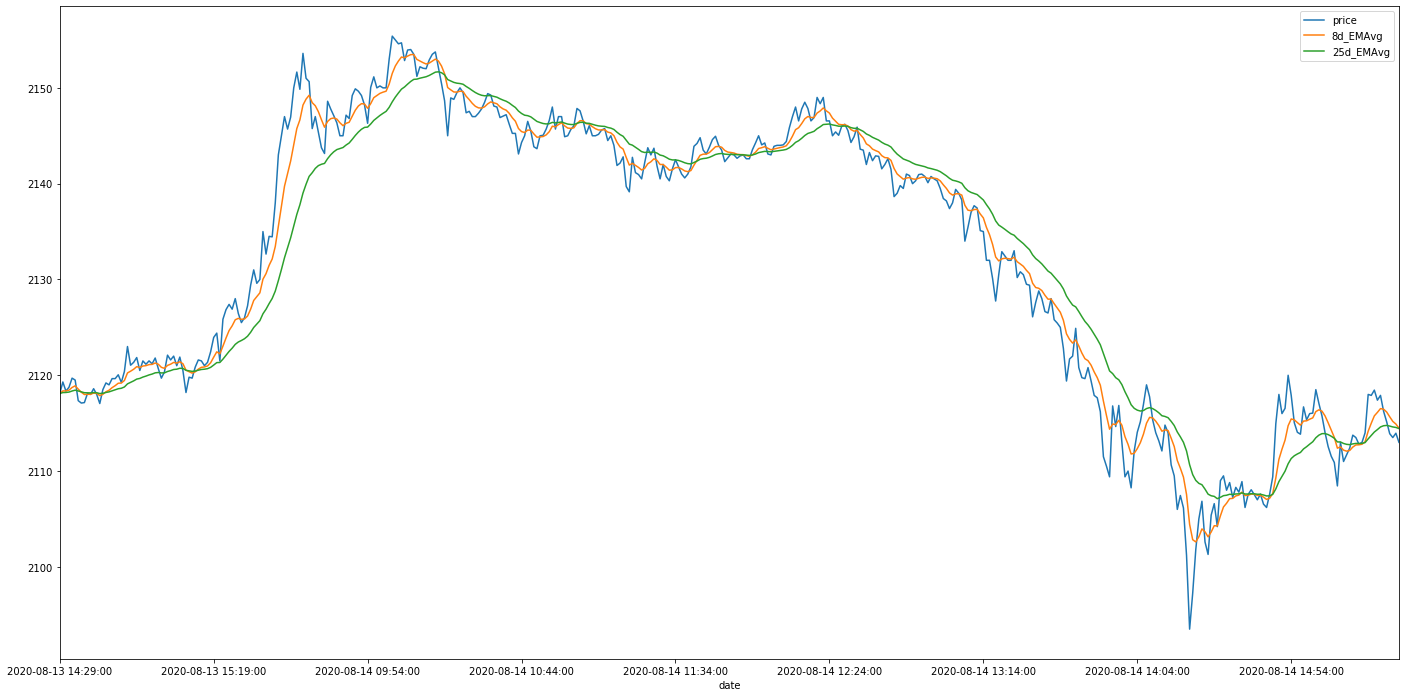

In [92]:
emav_df.plot(legend=True, figsize=(24, 12))

In [93]:
market_open = datetime(2020, 8, 14, 9, 30)
test_start = test_end - timedelta(days=1, hours=1)
trade_log = pd.DataFrame(columns=['time','price','8d_EMAvg','25d_EMAvg','transaction_type','status'])
current_status='closed'
for delta in range(335):
    sleep(0.5)
    test_end = market_open + timedelta(minutes=delta)
    test_start = test_end - timedelta(days=1, hours=1)
    hist_data = get_historical_data(rel_instoken, test_start, test_end, interval)
    emav_df = pd.DataFrame({'date':[datetime.strftime(d, "%Y-%m-%d %H:%M:%S") for d in list(hist_data['date'])],'price':list(hist_data['close'])}).set_index('date', drop=True)
    for window in [8, 25]:
        emav_df = get_exponential_moving_avg(emav_df, window)
    current_time = list(emav_df.index)[-1]
    current_price = emav_df.loc[current_time, 'price']
    current_8davg = emav_df.loc[current_time, '8d_EMAvg']
    current_25davg = emav_df.loc[current_time, '25d_EMAvg']
    if datetime.strftime(test_end, "%H:%M:%S")=='15:29:00':
        if current_status=='open':
            if current_transaction_type=='buy':
                transaction_type='sell'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
            if current_transaction_type=='sell':
                transaction_type='buy'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
        else:
            break
    elif current_8davg>current_25davg:
        if current_status=='closed':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            continue
        elif current_status=='open' and current_transaction_type=='sell':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
    elif current_8davg<current_25davg:
        if current_status=='closed':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='sell':
            continue

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+08%3A30%3A00&to=2020-08-14+09%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 6704
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+08%3A31%3A00&to=2020-08-14+09%3A31%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 6724
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+08%3A32%3A00&to=2020-08-14+09%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 6743
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+08%3A56%3A00&to=2020-08-14+09%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7186
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+08%3A57%3A00&to=2020-08-14+09%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7203
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+08%3A58%3A00&to=2020-08-14+09%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7218
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A23%3A00&to=2020-08-14+10%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7517
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A24%3A00&to=2020-08-14+10%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7518
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A25%3A00&to=2020-08-14+10%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7501
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A49%3A00&to=2020-08-14+10%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A50%3A00&to=2020-08-14+10%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+09%3A51%3A00&to=2020-08-14+10%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7514
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A16%3A00&to=2020-08-14+11%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7509
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A17%3A00&to=2020-08-14+11%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A18%3A00&to=2020-08-14+11%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7497
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A42%3A00&to=2020-08-14+11%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7507
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A43%3A00&to=2020-08-14+11%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+10%3A44%3A00&to=2020-08-14+11%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A09%3A00&to=2020-08-14+12%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A10%3A00&to=2020-08-14+12%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A11%3A00&to=2020-08-14+12%3A11%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7466
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A35%3A00&to=2020-08-14+12%3A35%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7520
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A36%3A00&to=2020-08-14+12%3A36%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7513
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+11%3A37%3A00&to=2020-08-14+12%3A37%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7525
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A02%3A00&to=2020-08-14+13%3A02%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A03%3A00&to=2020-08-14+13%3A03%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A04%3A00&to=2020-08-14+13%3A04%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7467
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A28%3A00&to=2020-08-14+13%3A28%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A29%3A00&to=2020-08-14+13%3A29%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A30%3A00&to=2020-08-14+13%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A55%3A00&to=2020-08-14+13%3A55%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7530
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A56%3A00&to=2020-08-14+13%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7534
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+12%3A57%3A00&to=2020-08-14+13%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7516
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A21%3A00&to=2020-08-14+14%3A21%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7571
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A22%3A00&to=2020-08-14+14%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7583
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A23%3A00&to=2020-08-14+14%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7594
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A48%3A00&to=2020-08-14+14%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7589
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A49%3A00&to=2020-08-14+14%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7594
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/738561/minute?instrument_token=738561&from=2020-08-13+13%3A50%3A00&to=2020-08-14+14%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7594
DEBUG:urllib3.connectionpool:Starting new HTTPS connect

In [94]:
trade_log.to_excel('Trade_Log-RUN4.xlsx')

# BANK NIFTY AUG FUTURES

#### 1 Minute Candle

In [18]:
instoken = get_instrument_token('BANKNIFTY20AUGFUT','FUT','NFO')
interval = '5minute'

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments HTTP/1.1" 200 892807


'11348226'

In [97]:
market_open = datetime(2020, 8, 18, 9, 30)
test_start = test_end - timedelta(days=1, hours=1)
trade_log = pd.DataFrame(columns=['time','price','8d_EMAvg','25d_EMAvg','transaction_type','status'])
current_status='closed'
for delta in range(360):
    sleep(0.5)
    test_end = market_open + timedelta(minutes=delta)
    test_start = test_end - timedelta(days=1, hours=1)
    hist_data = get_historical_data(instoken, test_start, test_end, interval)
    emav_df = pd.DataFrame({'date':[datetime.strftime(d, "%Y-%m-%d %H:%M:%S") for d in list(hist_data['date'])],'price':list(hist_data['close'])}).set_index('date', drop=True)
    for window in [8, 25]:
        emav_df = get_exponential_moving_avg(emav_df, window)
    current_time = list(emav_df.index)[-1]
    current_price = emav_df.loc[current_time, 'price']
    current_8davg = emav_df.loc[current_time, '8d_EMAvg']
    current_25davg = emav_df.loc[current_time, '25d_EMAvg']
    if datetime.strftime(test_end, "%H:%M:%S")=='15:29:00':
        if current_status=='open':
            if current_transaction_type=='buy':
                transaction_type='sell'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
            if current_transaction_type=='sell':
                transaction_type='buy'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
        else:
            break
    elif current_8davg>current_25davg:
        if current_status=='closed':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            continue
        elif current_status=='open' and current_transaction_type=='sell':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
    elif current_8davg<current_25davg:
        if current_status=='closed':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='sell':
            continue

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+08%3A30%3A00&to=2020-08-14+09%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7184
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+08%3A31%3A00&to=2020-08-14+09%3A31%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7205
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+08%3A32%3A00&to=2020-08-14+09%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7224
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+08%3A56%3A00&to=2020-08-14+09%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7679
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+08%3A57%3A00&to=2020-08-14+09%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7699
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+08%3A58%3A00&to=2020-08-14+09%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7718
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+09%3A22%3A00&to=2020-08-14+10%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8031
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+09%3A23%3A00&to=2020-08-14+10%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8041
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+09%3A24%3A00&to=2020-08-14+10%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8034
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+09%3A48%3A00&to=2020-08-14+10%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8032
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+09%3A49%3A00&to=2020-08-14+10%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8031
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+09%3A50%3A00&to=2020-08-14+10%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8023
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+10%3A14%3A00&to=2020-08-14+11%3A14%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8029
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+10%3A15%3A00&to=2020-08-14+11%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8026
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+10%3A16%3A00&to=2020-08-14+11%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8025
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+10%3A40%3A00&to=2020-08-14+11%3A40%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8041
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+10%3A41%3A00&to=2020-08-14+11%3A41%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8048
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+10%3A42%3A00&to=2020-08-14+11%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8037
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+11%3A06%3A00&to=2020-08-14+12%3A06%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8053
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+11%3A07%3A00&to=2020-08-14+12%3A07%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8057
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+11%3A08%3A00&to=2020-08-14+12%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8049
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+11%3A32%3A00&to=2020-08-14+12%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8112
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+11%3A33%3A00&to=2020-08-14+12%3A33%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8114
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+11%3A34%3A00&to=2020-08-14+12%3A34%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8104
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+11%3A58%3A00&to=2020-08-14+12%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8040
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+11%3A59%3A00&to=2020-08-14+12%3A59%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8046
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+12%3A00%3A00&to=2020-08-14+13%3A00%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8058
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+12%3A24%3A00&to=2020-08-14+13%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8043
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+12%3A25%3A00&to=2020-08-14+13%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8077
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+12%3A26%3A00&to=2020-08-14+13%3A26%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8071
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+12%3A50%3A00&to=2020-08-14+13%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8127
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+12%3A51%3A00&to=2020-08-14+13%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8135
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+12%3A52%3A00&to=2020-08-14+13%3A52%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8141
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+13%3A16%3A00&to=2020-08-14+14%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8214
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+13%3A17%3A00&to=2020-08-14+14%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8210
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+13%3A18%3A00&to=2020-08-14+14%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8232
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+13%3A42%3A00&to=2020-08-14+14%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8292
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+13%3A43%3A00&to=2020-08-14+14%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8287
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+13%3A44%3A00&to=2020-08-14+14%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8298
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+14%3A08%3A00&to=2020-08-14+15%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8334
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+14%3A09%3A00&to=2020-08-14+15%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8347
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-13+14%3A10%3A00&to=2020-08-14+15%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8349
DEBUG:urllib3.connectionpool:Starting new H

In [98]:
trade_log.to_excel('Trade_Log-RUN5.xlsx')

#### 3 Minute Candles

In [99]:
interval = '3minute'

In [100]:
market_open = datetime(2020, 8, 14, 9, 30)
test_start = test_end - timedelta(days=1, hours=1)
trade_log = pd.DataFrame(columns=['time','price','8d_EMAvg','25d_EMAvg','transaction_type','status'])
current_status='closed'
for delta in range(360):
    sleep(0.5)
    test_end = market_open + timedelta(minutes=delta)
    test_start = test_end - timedelta(days=1, hours=1)
    hist_data = get_historical_data(instoken, test_start, test_end, interval)
    emav_df = pd.DataFrame({'date':[datetime.strftime(d, "%Y-%m-%d %H:%M:%S") for d in list(hist_data['date'])],'price':list(hist_data['close'])}).set_index('date', drop=True)
    for window in [8, 25]:
        emav_df = get_exponential_moving_avg(emav_df, window)
    current_time = list(emav_df.index)[-1]
    current_price = emav_df.loc[current_time, 'price']
    current_8davg = emav_df.loc[current_time, '8d_EMAvg']
    current_25davg = emav_df.loc[current_time, '25d_EMAvg']
    if datetime.strftime(test_end, "%H:%M:%S")=='15:29:00':
        if current_status=='open':
            if current_transaction_type=='buy':
                transaction_type='sell'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
            if current_transaction_type=='sell':
                transaction_type='buy'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
        else:
            break
    elif current_8davg>current_25davg:
        if current_status=='closed':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            continue
        elif current_status=='open' and current_transaction_type=='sell':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
    elif current_8davg<current_25davg:
        if current_status=='closed':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='sell':
            continue

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+08%3A30%3A00&to=2020-08-14+09%3A30%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2626
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+08%3A31%3A00&to=2020-08-14+09%3A31%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2624
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+08%3A32%3A00&to=2020-08-14+09%3A32%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2625
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+08%3A56%3A00&to=2020-08-14+09%3A56%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2792
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+08%3A57%3A00&to=2020-08-14+09%3A57%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2813
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+08%3A58%3A00&to=2020-08-14+09%3A58%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2810
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+09%3A22%3A00&to=2020-08-14+10%3A22%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2932
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+09%3A23%3A00&to=2020-08-14+10%3A23%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2926
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+09%3A24%3A00&to=2020-08-14+10%3A24%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2917
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+09%3A48%3A00&to=2020-08-14+10%3A48%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2908
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+09%3A49%3A00&to=2020-08-14+10%3A49%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2914
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+09%3A50%3A00&to=2020-08-14+10%3A50%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2902
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+10%3A14%3A00&to=2020-08-14+11%3A14%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2906
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+10%3A15%3A00&to=2020-08-14+11%3A15%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2910
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+10%3A16%3A00&to=2020-08-14+11%3A16%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2902
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+10%3A40%3A00&to=2020-08-14+11%3A40%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2886
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+10%3A41%3A00&to=2020-08-14+11%3A41%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2897
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+10%3A42%3A00&to=2020-08-14+11%3A42%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2899
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+11%3A06%3A00&to=2020-08-14+12%3A06%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2906
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+11%3A07%3A00&to=2020-08-14+12%3A07%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2908
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+11%3A08%3A00&to=2020-08-14+12%3A08%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2904
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+11%3A32%3A00&to=2020-08-14+12%3A32%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2922
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+11%3A33%3A00&to=2020-08-14+12%3A33%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2922
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+11%3A34%3A00&to=2020-08-14+12%3A34%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2917
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+11%3A58%3A00&to=2020-08-14+12%3A58%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2897
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+11%3A59%3A00&to=2020-08-14+12%3A59%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2900
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+12%3A00%3A00&to=2020-08-14+13%3A00%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2905
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+12%3A24%3A00&to=2020-08-14+13%3A24%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2921
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+12%3A25%3A00&to=2020-08-14+13%3A25%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2927
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+12%3A26%3A00&to=2020-08-14+13%3A26%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2920
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+12%3A50%3A00&to=2020-08-14+13%3A50%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2934
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+12%3A51%3A00&to=2020-08-14+13%3A51%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2942
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+12%3A52%3A00&to=2020-08-14+13%3A52%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2938
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+13%3A16%3A00&to=2020-08-14+14%3A16%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2966
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+13%3A17%3A00&to=2020-08-14+14%3A17%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2965
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+13%3A18%3A00&to=2020-08-14+14%3A18%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2975
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+13%3A42%3A00&to=2020-08-14+14%3A42%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3020
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+13%3A43%3A00&to=2020-08-14+14%3A43%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3021
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+13%3A44%3A00&to=2020-08-14+14%3A44%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3018
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+14%3A08%3A00&to=2020-08-14+15%3A08%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3017
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+14%3A09%3A00&to=2020-08-14+15%3A09%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3018
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/3minute?instrument_token=11348226&from=2020-08-13+14%3A10%3A00&to=2020-08-14+15%3A10%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3018
DEBUG:urllib3.connectionpool:Starting

In [101]:
trade_log.to_excel('Trade_Log-RUN6.xlsx')

#### 5 Minute Candles

In [102]:
interval = '5minute'

In [103]:
market_open = datetime(2020, 8, 14, 9, 30)
test_start = test_end - timedelta(days=1, hours=1)
trade_log = pd.DataFrame(columns=['time','price','8d_EMAvg','25d_EMAvg','transaction_type','status'])
current_status='closed'
for delta in range(360):
    sleep(0.5)
    test_end = market_open + timedelta(minutes=delta)
    test_start = test_end - timedelta(days=1, hours=1)
    hist_data = get_historical_data(instoken, test_start, test_end, interval)
    emav_df = pd.DataFrame({'date':[datetime.strftime(d, "%Y-%m-%d %H:%M:%S") for d in list(hist_data['date'])],'price':list(hist_data['close'])}).set_index('date', drop=True)
    for window in [8, 25]:
        emav_df = get_exponential_moving_avg(emav_df, window)
    current_time = list(emav_df.index)[-1]
    current_price = emav_df.loc[current_time, 'price']
    current_8davg = emav_df.loc[current_time, '8d_EMAvg']
    current_25davg = emav_df.loc[current_time, '25d_EMAvg']
    if datetime.strftime(test_end, "%H:%M:%S")=='15:29:00':
        if current_status=='open':
            if current_transaction_type=='buy':
                transaction_type='sell'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
            if current_transaction_type=='sell':
                transaction_type='buy'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
        else:
            break
    elif current_8davg>current_25davg:
        if current_status=='closed':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            continue
        elif current_status=='open' and current_transaction_type=='sell':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
    elif current_8davg<current_25davg:
        if current_status=='closed':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='sell':
            continue

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+08%3A30%3A00&to=2020-08-14+09%3A30%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1620
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+08%3A31%3A00&to=2020-08-14+09%3A31%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1622
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+08%3A32%3A00&to=2020-08-14+09%3A32%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1622
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+08%3A56%3A00&to=2020-08-14+09%3A56%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1719
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+08%3A57%3A00&to=2020-08-14+09%3A57%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1720
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+08%3A58%3A00&to=2020-08-14+09%3A58%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1719
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+09%3A22%3A00&to=2020-08-14+10%3A22%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1798
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+09%3A23%3A00&to=2020-08-14+10%3A23%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1793
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+09%3A24%3A00&to=2020-08-14+10%3A24%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1793
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+09%3A48%3A00&to=2020-08-14+10%3A48%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1795
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+09%3A49%3A00&to=2020-08-14+10%3A49%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1799
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+09%3A50%3A00&to=2020-08-14+10%3A50%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1791
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+10%3A14%3A00&to=2020-08-14+11%3A14%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1791
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+10%3A15%3A00&to=2020-08-14+11%3A15%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1789
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+10%3A16%3A00&to=2020-08-14+11%3A16%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1788
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+10%3A40%3A00&to=2020-08-14+11%3A40%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1806
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+10%3A41%3A00&to=2020-08-14+11%3A41%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1800
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+10%3A42%3A00&to=2020-08-14+11%3A42%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1798
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+11%3A06%3A00&to=2020-08-14+12%3A06%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1801
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+11%3A07%3A00&to=2020-08-14+12%3A07%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1803
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+11%3A08%3A00&to=2020-08-14+12%3A08%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1803
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+11%3A32%3A00&to=2020-08-14+12%3A32%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1795
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+11%3A33%3A00&to=2020-08-14+12%3A33%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1795
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+11%3A34%3A00&to=2020-08-14+12%3A34%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1790
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+11%3A58%3A00&to=2020-08-14+12%3A58%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1790
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+11%3A59%3A00&to=2020-08-14+12%3A59%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1791
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+12%3A00%3A00&to=2020-08-14+13%3A00%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1797
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+12%3A24%3A00&to=2020-08-14+13%3A24%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1799
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+12%3A25%3A00&to=2020-08-14+13%3A25%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1808
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+12%3A26%3A00&to=2020-08-14+13%3A26%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1810
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+12%3A50%3A00&to=2020-08-14+13%3A50%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1822
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+12%3A51%3A00&to=2020-08-14+13%3A51%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1830
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+12%3A52%3A00&to=2020-08-14+13%3A52%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1815
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+13%3A16%3A00&to=2020-08-14+14%3A16%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1847
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+13%3A17%3A00&to=2020-08-14+14%3A17%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1845
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+13%3A18%3A00&to=2020-08-14+14%3A18%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1843
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+13%3A42%3A00&to=2020-08-14+14%3A42%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1874
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+13%3A43%3A00&to=2020-08-14+14%3A43%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1862
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+13%3A44%3A00&to=2020-08-14+14%3A44%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1869
DEBUG:urllib3.connectionpool:Starting

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+14%3A08%3A00&to=2020-08-14+15%3A08%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1884
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+14%3A09%3A00&to=2020-08-14+15%3A09%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1881
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-13+14%3A10%3A00&to=2020-08-14+15%3A10%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 1887
DEBUG:urllib3.connectionpool:Starting

In [104]:
trade_log.to_excel('Trade_Log-RUN7.xlsx')

#### 1 minute on Wednesday 12th Aug 2020

In [105]:
interval = 'minute'

In [106]:
market_open = datetime(2020, 8, 12, 9, 30)
test_start = test_end - timedelta(days=1, hours=1)
trade_log = pd.DataFrame(columns=['time','price','8d_EMAvg','25d_EMAvg','transaction_type','status'])
current_status='closed'
for delta in range(360):
    sleep(0.5)
    test_end = market_open + timedelta(minutes=delta)
    test_start = test_end - timedelta(days=1, hours=1)
    hist_data = get_historical_data(instoken, test_start, test_end, interval)
    emav_df = pd.DataFrame({'date':[datetime.strftime(d, "%Y-%m-%d %H:%M:%S") for d in list(hist_data['date'])],'price':list(hist_data['close'])}).set_index('date', drop=True)
    for window in [8, 25]:
        emav_df = get_exponential_moving_avg(emav_df, window)
    current_time = list(emav_df.index)[-1]
    current_price = emav_df.loc[current_time, 'price']
    current_8davg = emav_df.loc[current_time, '8d_EMAvg']
    current_25davg = emav_df.loc[current_time, '25d_EMAvg']
    if datetime.strftime(test_end, "%H:%M:%S")=='15:29:00':
        if current_status=='open':
            if current_transaction_type=='buy':
                transaction_type='sell'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
            if current_transaction_type=='sell':
                transaction_type='buy'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
                break
        else:
            break
    elif current_8davg>current_25davg:
        if current_status=='closed':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            continue
        elif current_status=='open' and current_transaction_type=='sell':
            transaction_type='buy'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
    elif current_8davg<current_25davg:
        if current_status=='closed':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            transaction_type='sell'
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_8davg=current_8davg, current_25davg=current_25davg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='sell':
            continue

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+08%3A30%3A00&to=2020-08-12+09%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7231
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+08%3A31%3A00&to=2020-08-12+09%3A31%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7253
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+08%3A32%3A00&to=2020-08-12+09%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7272
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+08%3A56%3A00&to=2020-08-12+09%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7719
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+08%3A57%3A00&to=2020-08-12+09%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7737
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+08%3A58%3A00&to=2020-08-12+09%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7757
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+09%3A22%3A00&to=2020-08-12+10%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8052
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+09%3A23%3A00&to=2020-08-12+10%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8052
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+09%3A24%3A00&to=2020-08-12+10%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8045
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+09%3A48%3A00&to=2020-08-12+10%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8030
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+09%3A49%3A00&to=2020-08-12+10%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8021
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+09%3A50%3A00&to=2020-08-12+10%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8012
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+10%3A14%3A00&to=2020-08-12+11%3A14%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7999
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+10%3A15%3A00&to=2020-08-12+11%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7995
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+10%3A16%3A00&to=2020-08-12+11%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8001
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+10%3A40%3A00&to=2020-08-12+11%3A40%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8032
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+10%3A41%3A00&to=2020-08-12+11%3A41%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8017
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+10%3A42%3A00&to=2020-08-12+11%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8022
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+11%3A06%3A00&to=2020-08-12+12%3A06%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8042
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+11%3A07%3A00&to=2020-08-12+12%3A07%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8046
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+11%3A08%3A00&to=2020-08-12+12%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8049
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+11%3A32%3A00&to=2020-08-12+12%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8059
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+11%3A33%3A00&to=2020-08-12+12%3A33%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8061
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+11%3A34%3A00&to=2020-08-12+12%3A34%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8066
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+11%3A58%3A00&to=2020-08-12+12%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8127
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+11%3A59%3A00&to=2020-08-12+12%3A59%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8131
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+12%3A00%3A00&to=2020-08-12+13%3A00%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8131
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+12%3A24%3A00&to=2020-08-12+13%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8168
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+12%3A25%3A00&to=2020-08-12+13%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8163
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+12%3A26%3A00&to=2020-08-12+13%3A26%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8156
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+12%3A50%3A00&to=2020-08-12+13%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8179
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+12%3A51%3A00&to=2020-08-12+13%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8182
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+12%3A52%3A00&to=2020-08-12+13%3A52%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8185
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+13%3A16%3A00&to=2020-08-12+14%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8219
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+13%3A17%3A00&to=2020-08-12+14%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8216
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+13%3A18%3A00&to=2020-08-12+14%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8221
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+13%3A42%3A00&to=2020-08-12+14%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8237
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+13%3A43%3A00&to=2020-08-12+14%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8241
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+13%3A44%3A00&to=2020-08-12+14%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8246
DEBUG:urllib3.connectionpool:Starting new H

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+14%3A08%3A00&to=2020-08-12+15%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8269
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+14%3A09%3A00&to=2020-08-12+15%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8252
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/minute?instrument_token=11348226&from=2020-08-11+14%3A10%3A00&to=2020-08-12+15%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8250
DEBUG:urllib3.connectionpool:Starting new H

In [107]:
trade_log.to_excel('Trade_Log-RUN8.xlsx')

In [108]:
trade_log.to_excel('Exponential_Moving_Averages-Test_Ouputs\Trade_Log-RUN9.xlsx')

In [19]:
instoken = get_instrument_token('BANKNIFTY20AUGFUT','FUT','NFO')
interval = '5minute'

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments HTTP/1.1" 200 892807


In [165]:
# 5 minute exponential moving average
moving_avg_dict = {}
market_open = datetime(2020, 8, 19, 9, 30)
for delta in range(0,360,5):
    test_end = market_open + timedelta(minutes=delta)
    test_start = test_end - timedelta(hours=1)
    print(datetime.strftime(test_end, "%H:%M"))
    hist_data = get_historical_data(instoken, test_start, test_end, interval)
    emav_df = pd.DataFrame({'date':[datetime.strftime(d, "%Y-%m-%d %H:%M:%S") for d in list(hist_data['date'])],'price':list(hist_data['close'])}).set_index('date', drop=True)
    for window in [2, 8]:
        emav_df = get_exponential_moving_avg(emav_df, window)
    emav_df['2d minus 8d'] = emav_df['2d_EMAvg']-emav_df['8d_EMAvg']
    moving_avg_dict[datetime.strftime(test_end, "%H:%M")] = emav_df

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


09:30


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+08%3A30%3A00&to=2020-08-19+09%3A30%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


09:35


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+08%3A35%3A00&to=2020-08-19+09%3A35%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


09:40


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+08%3A40%3A00&to=2020-08-19+09%3A40%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


09:45


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+08%3A45%3A00&to=2020-08-19+09%3A45%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


09:50


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+08%3A50%3A00&to=2020-08-19+09%3A50%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


09:55


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+08%3A55%3A00&to=2020-08-19+09%3A55%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A00%3A00&to=2020-08-19+10%3A00%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:05


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A05%3A00&to=2020-08-19+10%3A05%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:10


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A10%3A00&to=2020-08-19+10%3A10%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:15


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A15%3A00&to=2020-08-19+10%3A15%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:20


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A20%3A00&to=2020-08-19+10%3A20%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:25


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A25%3A00&to=2020-08-19+10%3A25%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:30


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A30%3A00&to=2020-08-19+10%3A30%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:35


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A35%3A00&to=2020-08-19+10%3A35%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:40


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A40%3A00&to=2020-08-19+10%3A40%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:45


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A45%3A00&to=2020-08-19+10%3A45%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:50


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A50%3A00&to=2020-08-19+10%3A50%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


10:55


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+09%3A55%3A00&to=2020-08-19+10%3A55%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A00%3A00&to=2020-08-19+11%3A00%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:05


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A05%3A00&to=2020-08-19+11%3A05%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:10


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A10%3A00&to=2020-08-19+11%3A10%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:15


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A15%3A00&to=2020-08-19+11%3A15%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:20


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A20%3A00&to=2020-08-19+11%3A20%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:25


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A25%3A00&to=2020-08-19+11%3A25%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:30


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A30%3A00&to=2020-08-19+11%3A30%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:35


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A35%3A00&to=2020-08-19+11%3A35%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:40


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A40%3A00&to=2020-08-19+11%3A40%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:45


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A45%3A00&to=2020-08-19+11%3A45%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:50


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A50%3A00&to=2020-08-19+11%3A50%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


11:55


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+10%3A55%3A00&to=2020-08-19+11%3A55%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A00%3A00&to=2020-08-19+12%3A00%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:05


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A05%3A00&to=2020-08-19+12%3A05%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:10


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A10%3A00&to=2020-08-19+12%3A10%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:15


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A15%3A00&to=2020-08-19+12%3A15%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:20


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A20%3A00&to=2020-08-19+12%3A20%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:25


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A25%3A00&to=2020-08-19+12%3A25%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:30


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A30%3A00&to=2020-08-19+12%3A30%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:35


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A35%3A00&to=2020-08-19+12%3A35%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:40


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A40%3A00&to=2020-08-19+12%3A40%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:45


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A45%3A00&to=2020-08-19+12%3A45%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:50


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A50%3A00&to=2020-08-19+12%3A50%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


12:55


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+11%3A55%3A00&to=2020-08-19+12%3A55%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A00%3A00&to=2020-08-19+13%3A00%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:05


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A05%3A00&to=2020-08-19+13%3A05%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:10


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A10%3A00&to=2020-08-19+13%3A10%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:15


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A15%3A00&to=2020-08-19+13%3A15%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:20


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A20%3A00&to=2020-08-19+13%3A20%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:25


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A25%3A00&to=2020-08-19+13%3A25%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:30


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A30%3A00&to=2020-08-19+13%3A30%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:35


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A35%3A00&to=2020-08-19+13%3A35%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:40


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A40%3A00&to=2020-08-19+13%3A40%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:45


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A45%3A00&to=2020-08-19+13%3A45%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:50


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A50%3A00&to=2020-08-19+13%3A50%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


13:55


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+12%3A55%3A00&to=2020-08-19+13%3A55%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A00%3A00&to=2020-08-19+14%3A00%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:05


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A05%3A00&to=2020-08-19+14%3A05%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:10


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A10%3A00&to=2020-08-19+14%3A10%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:15


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A15%3A00&to=2020-08-19+14%3A15%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:20


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A20%3A00&to=2020-08-19+14%3A20%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:25


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A25%3A00&to=2020-08-19+14%3A25%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:30


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A30%3A00&to=2020-08-19+14%3A30%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:35


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A35%3A00&to=2020-08-19+14%3A35%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:40


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A40%3A00&to=2020-08-19+14%3A40%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:45


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A45%3A00&to=2020-08-19+14%3A45%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:50


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A50%3A00&to=2020-08-19+14%3A50%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


14:55


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+13%3A55%3A00&to=2020-08-19+14%3A55%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+14%3A00%3A00&to=2020-08-19+15%3A00%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


15:05


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+14%3A05%3A00&to=2020-08-19+15%3A05%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


15:10


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+14%3A10%3A00&to=2020-08-19+15%3A10%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


15:15


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+14%3A15%3A00&to=2020-08-19+15%3A15%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


15:20


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+14%3A20%3A00&to=2020-08-19+15%3A20%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


15:25


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/11348226/5minute?instrument_token=11348226&from=2020-08-19+14%3A25%3A00&to=2020-08-19+15%3A25%3A00&interval=5minute&continuous=0&oi=0 HTTP/1.1" 200 None


# BANKNIFTY SEP FUT

In [26]:
def place_trade(trade_log, current_time, current_price, current_short_term_mavg, current_long_term_mavg, current_transaction_type):
    if len(trade_log)==0 or trade_log.loc[list(trade_log.index)[-1], 'status']=='closed':
        current_status = 'open'
    elif trade_log.loc[list(trade_log.index)[-1], 'status']=='open':
        current_status = 'closed'
    trade_log.loc[len(trade_log)] = [current_time, current_price, current_short_term_mavg, current_long_term_mavg, current_transaction_type, current_status]
    print(current_time, current_transaction_type, current_price, current_status)
    return trade_log, current_transaction_type, current_status

#### 5min

In [27]:
instoken = get_instrument_token(tradingsymbol, instrument_type, exchange)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments HTTP/1.1" 200 863438


In [41]:
market_open = datetime(2020, 9, 4, 9, 15)
short_term_emavg_duration = 4
long_term_emavg_duration = 20
interval = '3minute'

In [42]:
price_log = pd.DataFrame(columns=['time','price',str(short_term_emavg_duration)+'d_EMAvg',str(long_term_emavg_duration)+'d_EMAvg'])
trade_log = pd.DataFrame(columns=['time','price',str(short_term_emavg_duration)+'d_EMAvg',str(long_term_emavg_duration)+'d_EMAvg','transaction_type','status'])
current_status='closed'
for delta in range(0, 380, 3):
    sleep(0.5)
    test_end = market_open + timedelta(minutes=delta)
    print(test_end)
    test_start = test_end - timedelta(days=1, hours=1)
    hist_data = get_historical_data(instoken, test_start, test_end, interval)
    emav_df = pd.DataFrame({'date':[datetime.strftime(d, "%Y-%m-%d %H:%M:%S") for d in list(hist_data['date'])],'price':list(hist_data['close'])}).set_index('date', drop=True)
    for window in [short_term_emavg_duration, long_term_emavg_duration]:
        emav_df = get_exponential_moving_avg(emav_df, window)
    current_time = list(emav_df.index)[-1]
    current_price = emav_df.loc[current_time, 'price']
    current_short_term_mavg = emav_df.loc[current_time, str(short_term_emavg_duration)+'d_EMAvg']
    current_long_term_mavg = emav_df.loc[current_time, str(long_term_emavg_duration)+'d_EMAvg']
    price_log.loc[len(price_log)]=[current_time, current_price, current_short_term_mavg, current_long_term_mavg]
    if datetime.strftime(test_end, "%H:%M:%S")=='15:25:00':
        if current_status=='open':
            if current_transaction_type=='buy':
                transaction_type='sell'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
                break
            if current_transaction_type=='sell':
                transaction_type='buy'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
                break
        else:
            break
    
    elif current_short_term_mavg>current_long_term_mavg:
        transaction_type='buy'
        if current_status=='closed':
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='sell':
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
    elif current_short_term_mavg<current_long_term_mavg:
        transaction_type='sell'
        if current_status=='closed':
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A15%3A00&to=2020-09-04+09%3A15%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2557


2020-09-04 09:15:00 sell 22992.35 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A18%3A00&to=2020-09-04+09%3A18%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2581
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A21%3A00&to=2020-09-04+09%3A21%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2607
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A24%3A00&to=2020-09-04+09%3A24%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2630
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A27%3A00&to=2020-09-04+09%3A27%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2650
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A30%3A00&to=2020-09-04+09%3A30%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2673
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A33%3A00&to=2020-09-04+09%3A33%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2695
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A36%3A00&to=2020-09-04+09%3A36%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2715
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A39%3A00&to=2020-09-04+09%3A39%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2736
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A42%3A00&to=2020-09-04+09%3A42%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2757
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A45%3A00&to=2020-09-04+09%3A45%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2779
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A48%3A00&to=2020-09-04+09%3A48%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2803
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A51%3A00&to=2020-09-04+09%3A51%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2827
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A54%3A00&to=2020-09-04+09%3A54%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2846
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 09:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+08%3A57%3A00&to=2020-09-04+09%3A57%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2866
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A00%3A00&to=2020-09-04+10%3A00%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2888
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A03%3A00&to=2020-09-04+10%3A03%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2910
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A06%3A00&to=2020-09-04+10%3A06%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2934
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A09%3A00&to=2020-09-04+10%3A09%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2954
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A12%3A00&to=2020-09-04+10%3A12%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2978
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A15%3A00&to=2020-09-04+10%3A15%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2999
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A18%3A00&to=2020-09-04+10%3A18%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2987
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A21%3A00&to=2020-09-04+10%3A21%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2985
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A24%3A00&to=2020-09-04+10%3A24%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2979
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A27%3A00&to=2020-09-04+10%3A27%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2977
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A30%3A00&to=2020-09-04+10%3A30%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2979
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A33%3A00&to=2020-09-04+10%3A33%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2986
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A36%3A00&to=2020-09-04+10%3A36%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2980
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A39%3A00&to=2020-09-04+10%3A39%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2976
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A42%3A00&to=2020-09-04+10%3A42%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2975
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A45%3A00&to=2020-09-04+10%3A45%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2978
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A48%3A00&to=2020-09-04+10%3A48%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2968
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A51%3A00&to=2020-09-04+10%3A51%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2969
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A54%3A00&to=2020-09-04+10%3A54%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2957
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 10:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+09%3A57%3A00&to=2020-09-04+10%3A57%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2961
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A00%3A00&to=2020-09-04+11%3A00%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2960
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A03%3A00&to=2020-09-04+11%3A03%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2970
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A06%3A00&to=2020-09-04+11%3A06%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2966
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A09%3A00&to=2020-09-04+11%3A09%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2965
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A12%3A00&to=2020-09-04+11%3A12%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2964


2020-09-04 11:12:00 buy 23144.05 closed
2020-09-04 11:12:00 buy 23144.05 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A15%3A00&to=2020-09-04+11%3A15%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2962
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A18%3A00&to=2020-09-04+11%3A18%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2962
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A21%3A00&to=2020-09-04+11%3A21%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2962
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A24%3A00&to=2020-09-04+11%3A24%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2965
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A27%3A00&to=2020-09-04+11%3A27%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2975
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A30%3A00&to=2020-09-04+11%3A30%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2968


2020-09-04 11:30:00 sell 23120.0 closed
2020-09-04 11:30:00 sell 23120.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A33%3A00&to=2020-09-04+11%3A33%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2970
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A36%3A00&to=2020-09-04+11%3A36%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2971
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A39%3A00&to=2020-09-04+11%3A39%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2965


2020-09-04 11:39:00 buy 23136.0 closed
2020-09-04 11:39:00 buy 23136.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A42%3A00&to=2020-09-04+11%3A42%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2958
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A45%3A00&to=2020-09-04+11%3A45%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2966


2020-09-04 11:45:00 sell 23125.0 closed
2020-09-04 11:45:00 sell 23125.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A48%3A00&to=2020-09-04+11%3A48%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2963
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A51%3A00&to=2020-09-04+11%3A51%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2978
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A54%3A00&to=2020-09-04+11%3A54%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2976
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 11:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+10%3A57%3A00&to=2020-09-04+11%3A57%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2971
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A00%3A00&to=2020-09-04+12%3A00%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2958
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A03%3A00&to=2020-09-04+12%3A03%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2965
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A06%3A00&to=2020-09-04+12%3A06%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2957


2020-09-04 12:06:00 buy 23137.2 closed
2020-09-04 12:06:00 buy 23137.2 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A09%3A00&to=2020-09-04+12%3A09%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2957
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A12%3A00&to=2020-09-04+12%3A12%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2951
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A15%3A00&to=2020-09-04+12%3A15%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2962
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A18%3A00&to=2020-09-04+12%3A18%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2961
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A21%3A00&to=2020-09-04+12%3A21%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2960
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A24%3A00&to=2020-09-04+12%3A24%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2958
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A27%3A00&to=2020-09-04+12%3A27%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2958
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A30%3A00&to=2020-09-04+12%3A30%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2950
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A33%3A00&to=2020-09-04+12%3A33%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2945
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A36%3A00&to=2020-09-04+12%3A36%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2952
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A39%3A00&to=2020-09-04+12%3A39%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2950
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A42%3A00&to=2020-09-04+12%3A42%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2956
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A45%3A00&to=2020-09-04+12%3A45%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2954
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A48%3A00&to=2020-09-04+12%3A48%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2956
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A51%3A00&to=2020-09-04+12%3A51%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2960
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A54%3A00&to=2020-09-04+12%3A54%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2961
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 12:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+11%3A57%3A00&to=2020-09-04+12%3A57%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2967
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A00%3A00&to=2020-09-04+13%3A00%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2968
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A03%3A00&to=2020-09-04+13%3A03%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2961
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A06%3A00&to=2020-09-04+13%3A06%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2955
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A09%3A00&to=2020-09-04+13%3A09%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2957
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A12%3A00&to=2020-09-04+13%3A12%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2957
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A15%3A00&to=2020-09-04+13%3A15%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2965
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A18%3A00&to=2020-09-04+13%3A18%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2966
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A21%3A00&to=2020-09-04+13%3A21%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2970
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A24%3A00&to=2020-09-04+13%3A24%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2967
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A27%3A00&to=2020-09-04+13%3A27%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2977
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A30%3A00&to=2020-09-04+13%3A30%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2971
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A33%3A00&to=2020-09-04+13%3A33%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2975
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A36%3A00&to=2020-09-04+13%3A36%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2981
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A39%3A00&to=2020-09-04+13%3A39%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2979
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A42%3A00&to=2020-09-04+13%3A42%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2977
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A45%3A00&to=2020-09-04+13%3A45%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2981
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A48%3A00&to=2020-09-04+13%3A48%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2981
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A51%3A00&to=2020-09-04+13%3A51%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2975
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A54%3A00&to=2020-09-04+13%3A54%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2981


2020-09-04 13:54:00 sell 23287.05 closed
2020-09-04 13:54:00 sell 23287.05 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 13:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+12%3A57%3A00&to=2020-09-04+13%3A57%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2975


2020-09-04 13:57:00 buy 23313.8 closed
2020-09-04 13:57:00 buy 23313.8 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A00%3A00&to=2020-09-04+14%3A00%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2973


2020-09-04 14:00:00 sell 23289.8 closed
2020-09-04 14:00:00 sell 23289.8 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A03%3A00&to=2020-09-04+14%3A03%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2978
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A06%3A00&to=2020-09-04+14%3A06%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2976
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A09%3A00&to=2020-09-04+14%3A09%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2983
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A12%3A00&to=2020-09-04+14%3A12%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2980
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A15%3A00&to=2020-09-04+14%3A15%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2984
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A18%3A00&to=2020-09-04+14%3A18%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2990
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A21%3A00&to=2020-09-04+14%3A21%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2993
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A24%3A00&to=2020-09-04+14%3A24%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2993
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A27%3A00&to=2020-09-04+14%3A27%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2996
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A30%3A00&to=2020-09-04+14%3A30%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3000
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A33%3A00&to=2020-09-04+14%3A33%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3004
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A36%3A00&to=2020-09-04+14%3A36%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3000
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A39%3A00&to=2020-09-04+14%3A39%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3005
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A42%3A00&to=2020-09-04+14%3A42%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2997
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A45%3A00&to=2020-09-04+14%3A45%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3002
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A48%3A00&to=2020-09-04+14%3A48%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3008
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A51%3A00&to=2020-09-04+14%3A51%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3006
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A54%3A00&to=2020-09-04+14%3A54%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3014
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 14:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+13%3A57%3A00&to=2020-09-04+14%3A57%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3014
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A00%3A00&to=2020-09-04+15%3A00%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3010
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A03%3A00&to=2020-09-04+15%3A03%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3017
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A06%3A00&to=2020-09-04+15%3A06%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3017
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A09%3A00&to=2020-09-04+15%3A09%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3020
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A12%3A00&to=2020-09-04+15%3A12%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3019
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A15%3A00&to=2020-09-04+15%3A15%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3014
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A18%3A00&to=2020-09-04+15%3A18%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3020
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A21%3A00&to=2020-09-04+15%3A21%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3022
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A24%3A00&to=2020-09-04+15%3A24%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3029
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A27%3A00&to=2020-09-04+15%3A27%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3028


2020-09-04 15:27:00 buy 23069.65 closed
2020-09-04 15:27:00 buy 23069.65 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A30%3A00&to=2020-09-04+15%3A30%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 3022
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-04 15:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/3minute?instrument_token=14956290&from=2020-09-03+14%3A33%3A00&to=2020-09-04+15%3A33%3A00&interval=3minute&continuous=0&oi=0 HTTP/1.1" 200 2999


In [45]:
trade_log.to_excel('Exponential_Moving_Averages-Test_Ouputs\Trade_Log_20200904_3min.xlsx')

In [32]:
price_log.to_excel('Exponential_Moving_Averages-Test_Ouputs\Price_Log_20200904_3min.xlsx')

# BANKNIFTY SEP FUT

In [26]:
def place_trade(trade_log, current_time, current_price, current_short_term_mavg, current_long_term_mavg, current_transaction_type):
    if len(trade_log)==0 or trade_log.loc[list(trade_log.index)[-1], 'status']=='closed':
        current_status = 'open'
    elif trade_log.loc[list(trade_log.index)[-1], 'status']=='open':
        current_status = 'closed'
    trade_log.loc[len(trade_log)] = [current_time, current_price, current_short_term_mavg, current_long_term_mavg, current_transaction_type, current_status]
    print(current_time, current_transaction_type, current_price, current_status)
    return trade_log, current_transaction_type, current_status

#### 1min simple moving average

In [27]:
instoken = get_instrument_token(tradingsymbol, instrument_type, exchange)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443
DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments HTTP/1.1" 200 863438


In [46]:
market_open = datetime(2020, 9, 2, 9, 15)
short_term_emavg_duration = 4
long_term_emavg_duration = 20
interval = 'minute'

In [47]:
price_log = pd.DataFrame(columns=['time','price',str(short_term_emavg_duration)+'d_EMAvg',str(long_term_emavg_duration)+'d_EMAvg'])
trade_log = pd.DataFrame(columns=['time','price',str(short_term_emavg_duration)+'d_EMAvg',str(long_term_emavg_duration)+'d_EMAvg','transaction_type','status'])
current_status='closed'
for delta in range(0, 380, 1):
    sleep(0.5)
    test_end = market_open + timedelta(minutes=delta)
    print(test_end)
    test_start = test_end - timedelta(days=1, hours=1)
    hist_data = get_historical_data(instoken, test_start, test_end, interval)
    timeseries = pd.DataFrame({'date':[datetime.strftime(d, "%Y-%m-%d %H:%M:%S") for d in list(hist_data['date'])],'price':list(hist_data['close'])}).set_index('date', drop=True)
    for window in [short_term_emavg_duration, long_term_emavg_duration]:
        emav_df = get_moving_average(timeseries, window)
    current_time = list(emav_df.index)[-1]
    current_price = emav_df.loc[current_time, 'price']
    current_short_term_mavg = emav_df.loc[current_time, str(short_term_emavg_duration)+'d_EMAvg']
    current_long_term_mavg = emav_df.loc[current_time, str(long_term_emavg_duration)+'d_EMAvg']
    price_log.loc[len(price_log)]=[current_time, current_price, current_short_term_mavg, current_long_term_mavg]
    if datetime.strftime(test_end, "%H:%M:%S")=='15:25:00':
        if current_status=='open':
            if current_transaction_type=='buy':
                transaction_type='sell'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
                break
            if current_transaction_type=='sell':
                transaction_type='buy'
                trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
                break
        else:
            break
    
    elif current_short_term_mavg>current_long_term_mavg:
        transaction_type='buy'
        if current_status=='closed':
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='sell':
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
    elif current_short_term_mavg<current_long_term_mavg:
        transaction_type='sell'
        if current_status=='closed':
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
        elif current_status=='open' and current_transaction_type=='buy':
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)
            trade_log, current_transaction_type, current_status = place_trade(trade_log, current_time=current_time, current_price=current_price, current_short_term_mavg=current_short_term_mavg, current_long_term_mavg=current_long_term_mavg, current_transaction_type=transaction_type)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A15%3A00&to=2020-09-02+09%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7612


2020-09-02 09:15:00 sell 23819.1 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:16:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A16%3A00&to=2020-09-02+09%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7635
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:17:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A17%3A00&to=2020-09-02+09%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7657
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A18%3A00&to=2020-09-02+09%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7677
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:19:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A19%3A00&to=2020-09-02+09%3A19%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7699
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:20:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A20%3A00&to=2020-09-02+09%3A20%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7719
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A21%3A00&to=2020-09-02+09%3A21%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7743
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:22:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A22%3A00&to=2020-09-02+09%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7765
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:23:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A23%3A00&to=2020-09-02+09%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7790
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A24%3A00&to=2020-09-02+09%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7810
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:25:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A25%3A00&to=2020-09-02+09%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7833
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:26:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A26%3A00&to=2020-09-02+09%3A26%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7852
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A27%3A00&to=2020-09-02+09%3A27%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7871
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:28:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A28%3A00&to=2020-09-02+09%3A28%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7892
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:29:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A29%3A00&to=2020-09-02+09%3A29%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7909
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A30%3A00&to=2020-09-02+09%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7930
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:31:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A31%3A00&to=2020-09-02+09%3A31%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7949
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:32:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A32%3A00&to=2020-09-02+09%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7966
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A33%3A00&to=2020-09-02+09%3A33%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 7985
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:34:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A34%3A00&to=2020-09-02+09%3A34%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8004


2020-09-02 09:34:00 buy 23766.25 closed
2020-09-02 09:34:00 buy 23766.25 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:35:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A35%3A00&to=2020-09-02+09%3A35%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8023
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A36%3A00&to=2020-09-02+09%3A36%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8045
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:37:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A37%3A00&to=2020-09-02+09%3A37%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8062
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:38:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A38%3A00&to=2020-09-02+09%3A38%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8082
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A39%3A00&to=2020-09-02+09%3A39%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8101
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:40:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A40%3A00&to=2020-09-02+09%3A40%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8120
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:41:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A41%3A00&to=2020-09-02+09%3A41%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8141
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A42%3A00&to=2020-09-02+09%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8159
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:43:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A43%3A00&to=2020-09-02+09%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8181


2020-09-02 09:43:00 sell 23712.05 closed
2020-09-02 09:43:00 sell 23712.05 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:44:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A44%3A00&to=2020-09-02+09%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8204
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A45%3A00&to=2020-09-02+09%3A45%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8225
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:46:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A46%3A00&to=2020-09-02+09%3A46%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8245
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:47:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A47%3A00&to=2020-09-02+09%3A47%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8263
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A48%3A00&to=2020-09-02+09%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8282
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:49:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A49%3A00&to=2020-09-02+09%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8302
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:50:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A50%3A00&to=2020-09-02+09%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8322
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A51%3A00&to=2020-09-02+09%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8342
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:52:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A52%3A00&to=2020-09-02+09%3A52%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8359
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:53:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A53%3A00&to=2020-09-02+09%3A53%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8375
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A54%3A00&to=2020-09-02+09%3A54%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8397
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:55:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A55%3A00&to=2020-09-02+09%3A55%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8416
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:56:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A56%3A00&to=2020-09-02+09%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8432
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A57%3A00&to=2020-09-02+09%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8453
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:58:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A58%3A00&to=2020-09-02+09%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 09:59:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+08%3A59%3A00&to=2020-09-02+09%3A59%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A00%3A00&to=2020-09-02+10%3A00%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8511


2020-09-02 10:00:00 buy 23761.05 closed
2020-09-02 10:00:00 buy 23761.05 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:01:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A01%3A00&to=2020-09-02+10%3A01%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8532
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:02:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A02%3A00&to=2020-09-02+10%3A02%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8549
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A03%3A00&to=2020-09-02+10%3A03%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8569
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:04:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A04%3A00&to=2020-09-02+10%3A04%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8590
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:05:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A05%3A00&to=2020-09-02+10%3A05%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8613


2020-09-02 10:05:00 sell 23685.05 closed
2020-09-02 10:05:00 sell 23685.05 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A06%3A00&to=2020-09-02+10%3A06%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8633
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:07:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A07%3A00&to=2020-09-02+10%3A07%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8649
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:08:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A08%3A00&to=2020-09-02+10%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8667
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A09%3A00&to=2020-09-02+10%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8685
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:10:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A10%3A00&to=2020-09-02+10%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8708
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:11:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A11%3A00&to=2020-09-02+10%3A11%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8729
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A12%3A00&to=2020-09-02+10%3A12%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8751
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:13:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A13%3A00&to=2020-09-02+10%3A13%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8770
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:14:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A14%3A00&to=2020-09-02+10%3A14%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8793
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A15%3A00&to=2020-09-02+10%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8814
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:16:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A16%3A00&to=2020-09-02+10%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8806
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:17:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A17%3A00&to=2020-09-02+10%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8800
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A18%3A00&to=2020-09-02+10%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8799
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:19:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A19%3A00&to=2020-09-02+10%3A19%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8781
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:20:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A20%3A00&to=2020-09-02+10%3A20%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8787
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A21%3A00&to=2020-09-02+10%3A21%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8799
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:22:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A22%3A00&to=2020-09-02+10%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8796
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:23:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A23%3A00&to=2020-09-02+10%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8806
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A24%3A00&to=2020-09-02+10%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8812
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:25:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A25%3A00&to=2020-09-02+10%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8824
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:26:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A26%3A00&to=2020-09-02+10%3A26%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8818
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A27%3A00&to=2020-09-02+10%3A27%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8823
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:28:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A28%3A00&to=2020-09-02+10%3A28%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8823
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:29:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A29%3A00&to=2020-09-02+10%3A29%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8810
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A30%3A00&to=2020-09-02+10%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8794
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:31:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A31%3A00&to=2020-09-02+10%3A31%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8812
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:32:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A32%3A00&to=2020-09-02+10%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8802
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A33%3A00&to=2020-09-02+10%3A33%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8788
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:34:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A34%3A00&to=2020-09-02+10%3A34%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8798
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:35:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A35%3A00&to=2020-09-02+10%3A35%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8793
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A36%3A00&to=2020-09-02+10%3A36%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8802
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:37:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A37%3A00&to=2020-09-02+10%3A37%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8810


2020-09-02 10:37:00 buy 23604.8 closed
2020-09-02 10:37:00 buy 23604.8 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:38:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A38%3A00&to=2020-09-02+10%3A38%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8806
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A39%3A00&to=2020-09-02+10%3A39%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8797
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:40:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A40%3A00&to=2020-09-02+10%3A40%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8780
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:41:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A41%3A00&to=2020-09-02+10%3A41%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8788
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A42%3A00&to=2020-09-02+10%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8788
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:43:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A43%3A00&to=2020-09-02+10%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8787
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:44:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A44%3A00&to=2020-09-02+10%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8772
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A45%3A00&to=2020-09-02+10%3A45%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8760
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:46:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A46%3A00&to=2020-09-02+10%3A46%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8764
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:47:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A47%3A00&to=2020-09-02+10%3A47%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8768
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A48%3A00&to=2020-09-02+10%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8769
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:49:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A49%3A00&to=2020-09-02+10%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8754
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:50:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A50%3A00&to=2020-09-02+10%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8751
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A51%3A00&to=2020-09-02+10%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8755
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:52:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A52%3A00&to=2020-09-02+10%3A52%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8739


2020-09-02 10:52:00 sell 23599.75 closed
2020-09-02 10:52:00 sell 23599.75 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:53:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A53%3A00&to=2020-09-02+10%3A53%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8741
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A54%3A00&to=2020-09-02+10%3A54%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8744
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:55:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A55%3A00&to=2020-09-02+10%3A55%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8752
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:56:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A56%3A00&to=2020-09-02+10%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8753
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A57%3A00&to=2020-09-02+10%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8754
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:58:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A58%3A00&to=2020-09-02+10%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8744
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 10:59:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+09%3A59%3A00&to=2020-09-02+10%3A59%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8728
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A00%3A00&to=2020-09-02+11%3A00%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8718
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:01:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A01%3A00&to=2020-09-02+11%3A01%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8716
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:02:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A02%3A00&to=2020-09-02+11%3A02%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8715
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A03%3A00&to=2020-09-02+11%3A03%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8713


2020-09-02 11:03:00 buy 23614.0 closed
2020-09-02 11:03:00 buy 23614.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:04:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A04%3A00&to=2020-09-02+11%3A04%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8712
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:05:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A05%3A00&to=2020-09-02+11%3A05%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8714
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A06%3A00&to=2020-09-02+11%3A06%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8716
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:07:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A07%3A00&to=2020-09-02+11%3A07%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8708
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:08:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A08%3A00&to=2020-09-02+11%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8722
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A09%3A00&to=2020-09-02+11%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8730
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:10:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A10%3A00&to=2020-09-02+11%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8719


2020-09-02 11:10:00 sell 23587.45 closed
2020-09-02 11:10:00 sell 23587.45 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:11:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A11%3A00&to=2020-09-02+11%3A11%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8729


2020-09-02 11:11:00 buy 23614.55 closed
2020-09-02 11:11:00 buy 23614.55 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A12%3A00&to=2020-09-02+11%3A12%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8716
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:13:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A13%3A00&to=2020-09-02+11%3A13%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8724
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:14:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A14%3A00&to=2020-09-02+11%3A14%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8719
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A15%3A00&to=2020-09-02+11%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8724
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:16:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A16%3A00&to=2020-09-02+11%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8720
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:17:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A17%3A00&to=2020-09-02+11%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8711
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A18%3A00&to=2020-09-02+11%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8712
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:19:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A19%3A00&to=2020-09-02+11%3A19%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8702
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:20:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A20%3A00&to=2020-09-02+11%3A20%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8707
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A21%3A00&to=2020-09-02+11%3A21%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8709
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:22:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A22%3A00&to=2020-09-02+11%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8716
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:23:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A23%3A00&to=2020-09-02+11%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8735
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A24%3A00&to=2020-09-02+11%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8719
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:25:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A25%3A00&to=2020-09-02+11%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8722
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:26:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A26%3A00&to=2020-09-02+11%3A26%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8720
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A27%3A00&to=2020-09-02+11%3A27%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8718
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:28:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A28%3A00&to=2020-09-02+11%3A28%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8717
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:29:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A29%3A00&to=2020-09-02+11%3A29%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8711


2020-09-02 11:29:00 sell 23644.15 closed
2020-09-02 11:29:00 sell 23644.15 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A30%3A00&to=2020-09-02+11%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8712
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:31:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A31%3A00&to=2020-09-02+11%3A31%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8729
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:32:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A32%3A00&to=2020-09-02+11%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8722
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A33%3A00&to=2020-09-02+11%3A33%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8732
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:34:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A34%3A00&to=2020-09-02+11%3A34%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8721
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:35:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A35%3A00&to=2020-09-02+11%3A35%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8735


2020-09-02 11:35:00 buy 23701.65 closed
2020-09-02 11:35:00 buy 23701.65 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A36%3A00&to=2020-09-02+11%3A36%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8725
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:37:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A37%3A00&to=2020-09-02+11%3A37%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8723
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:38:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A38%3A00&to=2020-09-02+11%3A38%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8726
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A39%3A00&to=2020-09-02+11%3A39%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8713
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:40:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A40%3A00&to=2020-09-02+11%3A40%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8727
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:41:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A41%3A00&to=2020-09-02+11%3A41%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8725
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A42%3A00&to=2020-09-02+11%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8724
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:43:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A43%3A00&to=2020-09-02+11%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8726
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:44:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A44%3A00&to=2020-09-02+11%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8730
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A45%3A00&to=2020-09-02+11%3A45%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8728
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:46:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A46%3A00&to=2020-09-02+11%3A46%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8730
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:47:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A47%3A00&to=2020-09-02+11%3A47%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8730
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A48%3A00&to=2020-09-02+11%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8731
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:49:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A49%3A00&to=2020-09-02+11%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8723
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:50:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A50%3A00&to=2020-09-02+11%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8737
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A51%3A00&to=2020-09-02+11%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8716


2020-09-02 11:51:00 sell 23702.85 closed
2020-09-02 11:51:00 sell 23702.85 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:52:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A52%3A00&to=2020-09-02+11%3A52%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8729
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:53:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A53%3A00&to=2020-09-02+11%3A53%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8735
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A54%3A00&to=2020-09-02+11%3A54%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8735
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:55:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A55%3A00&to=2020-09-02+11%3A55%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8732
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:56:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A56%3A00&to=2020-09-02+11%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8738
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A57%3A00&to=2020-09-02+11%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8737
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:58:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A58%3A00&to=2020-09-02+11%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8742
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 11:59:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+10%3A59%3A00&to=2020-09-02+11%3A59%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8741
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A00%3A00&to=2020-09-02+12%3A00%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8743
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:01:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A01%3A00&to=2020-09-02+12%3A01%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8746
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:02:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A02%3A00&to=2020-09-02+12%3A02%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8740
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A03%3A00&to=2020-09-02+12%3A03%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8746
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:04:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A04%3A00&to=2020-09-02+12%3A04%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8745
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:05:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A05%3A00&to=2020-09-02+12%3A05%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8753
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A06%3A00&to=2020-09-02+12%3A06%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8743
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:07:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A07%3A00&to=2020-09-02+12%3A07%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8745
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:08:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A08%3A00&to=2020-09-02+12%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8741
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A09%3A00&to=2020-09-02+12%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8738
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:10:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A10%3A00&to=2020-09-02+12%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8743
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:11:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A11%3A00&to=2020-09-02+12%3A11%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8737
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A12%3A00&to=2020-09-02+12%3A12%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8740
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:13:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A13%3A00&to=2020-09-02+12%3A13%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8731
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:14:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A14%3A00&to=2020-09-02+12%3A14%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8736


2020-09-02 12:14:00 buy 23652.4 closed
2020-09-02 12:14:00 buy 23652.4 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A15%3A00&to=2020-09-02+12%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8723
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:16:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A16%3A00&to=2020-09-02+12%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8731


2020-09-02 12:16:00 sell 23607.95 closed
2020-09-02 12:16:00 sell 23607.95 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:17:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A17%3A00&to=2020-09-02+12%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8726
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A18%3A00&to=2020-09-02+12%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8731
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:19:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A19%3A00&to=2020-09-02+12%3A19%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8728
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:20:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A20%3A00&to=2020-09-02+12%3A20%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8723
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A21%3A00&to=2020-09-02+12%3A21%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8711
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:22:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A22%3A00&to=2020-09-02+12%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8715
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:23:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A23%3A00&to=2020-09-02+12%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8711
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A24%3A00&to=2020-09-02+12%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8714
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:25:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A25%3A00&to=2020-09-02+12%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8719
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:26:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A26%3A00&to=2020-09-02+12%3A26%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8718
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A27%3A00&to=2020-09-02+12%3A27%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8732
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:28:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A28%3A00&to=2020-09-02+12%3A28%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8737
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:29:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A29%3A00&to=2020-09-02+12%3A29%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8737
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A30%3A00&to=2020-09-02+12%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8734
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:31:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A31%3A00&to=2020-09-02+12%3A31%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8725
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:32:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A32%3A00&to=2020-09-02+12%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8731
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A33%3A00&to=2020-09-02+12%3A33%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8722


2020-09-02 12:33:00 buy 23620.8 closed
2020-09-02 12:33:00 buy 23620.8 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:34:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A34%3A00&to=2020-09-02+12%3A34%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8712
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:35:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A35%3A00&to=2020-09-02+12%3A35%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8703
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A36%3A00&to=2020-09-02+12%3A36%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8701
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:37:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A37%3A00&to=2020-09-02+12%3A37%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8693
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:38:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A38%3A00&to=2020-09-02+12%3A38%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8691
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A39%3A00&to=2020-09-02+12%3A39%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8685
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:40:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A40%3A00&to=2020-09-02+12%3A40%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8674
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:41:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A41%3A00&to=2020-09-02+12%3A41%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8683
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A42%3A00&to=2020-09-02+12%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8674
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:43:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A43%3A00&to=2020-09-02+12%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8672
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:44:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A44%3A00&to=2020-09-02+12%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8681
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A45%3A00&to=2020-09-02+12%3A45%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8683
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:46:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A46%3A00&to=2020-09-02+12%3A46%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8674
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:47:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A47%3A00&to=2020-09-02+12%3A47%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8682
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A48%3A00&to=2020-09-02+12%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8681
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:49:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A49%3A00&to=2020-09-02+12%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8664
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:50:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A50%3A00&to=2020-09-02+12%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8674


2020-09-02 12:50:00 sell 23561.6 closed
2020-09-02 12:50:00 sell 23561.6 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A51%3A00&to=2020-09-02+12%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8671
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:52:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A52%3A00&to=2020-09-02+12%3A52%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8665
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:53:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A53%3A00&to=2020-09-02+12%3A53%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8666
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A54%3A00&to=2020-09-02+12%3A54%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8681
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:55:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A55%3A00&to=2020-09-02+12%3A55%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8670
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:56:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A56%3A00&to=2020-09-02+12%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8680
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A57%3A00&to=2020-09-02+12%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8664
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:58:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A58%3A00&to=2020-09-02+12%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8665
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 12:59:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+11%3A59%3A00&to=2020-09-02+12%3A59%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8644
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A00%3A00&to=2020-09-02+13%3A00%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8651
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:01:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A01%3A00&to=2020-09-02+13%3A01%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8651
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:02:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A02%3A00&to=2020-09-02+13%3A02%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8639
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A03%3A00&to=2020-09-02+13%3A03%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8644
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:04:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A04%3A00&to=2020-09-02+13%3A04%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8644
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:05:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A05%3A00&to=2020-09-02+13%3A05%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8650
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A06%3A00&to=2020-09-02+13%3A06%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8650
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:07:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A07%3A00&to=2020-09-02+13%3A07%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8649


2020-09-02 13:07:00 buy 23611.35 closed
2020-09-02 13:07:00 buy 23611.35 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:08:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A08%3A00&to=2020-09-02+13%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8645
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A09%3A00&to=2020-09-02+13%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8641
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:10:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A10%3A00&to=2020-09-02+13%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8645
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:11:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A11%3A00&to=2020-09-02+13%3A11%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8646
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A12%3A00&to=2020-09-02+13%3A12%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8650


2020-09-02 13:12:00 sell 23594.5 closed
2020-09-02 13:12:00 sell 23594.5 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:13:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A13%3A00&to=2020-09-02+13%3A13%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8649


2020-09-02 13:13:00 buy 23602.0 closed
2020-09-02 13:13:00 buy 23602.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:14:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A14%3A00&to=2020-09-02+13%3A14%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8645
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A15%3A00&to=2020-09-02+13%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8638


2020-09-02 13:15:00 sell 23570.1 closed
2020-09-02 13:15:00 sell 23570.1 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:16:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A16%3A00&to=2020-09-02+13%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8640
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:17:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A17%3A00&to=2020-09-02+13%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8644
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A18%3A00&to=2020-09-02+13%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8650
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:19:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A19%3A00&to=2020-09-02+13%3A19%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8652
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:20:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A20%3A00&to=2020-09-02+13%3A20%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8650
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A21%3A00&to=2020-09-02+13%3A21%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8646
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:22:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A22%3A00&to=2020-09-02+13%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8648


2020-09-02 13:22:00 buy 23609.0 closed
2020-09-02 13:22:00 buy 23609.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:23:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A23%3A00&to=2020-09-02+13%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8634
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A24%3A00&to=2020-09-02+13%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8634


2020-09-02 13:24:00 sell 23577.7 closed
2020-09-02 13:24:00 sell 23577.7 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:25:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A25%3A00&to=2020-09-02+13%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8634


2020-09-02 13:25:00 buy 23598.0 closed
2020-09-02 13:25:00 buy 23598.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:26:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A26%3A00&to=2020-09-02+13%3A26%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8639
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A27%3A00&to=2020-09-02+13%3A27%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8646
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:28:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A28%3A00&to=2020-09-02+13%3A28%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8641
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:29:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A29%3A00&to=2020-09-02+13%3A29%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8648


2020-09-02 13:29:00 sell 23570.0 closed
2020-09-02 13:29:00 sell 23570.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A30%3A00&to=2020-09-02+13%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8646
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:31:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A31%3A00&to=2020-09-02+13%3A31%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8640
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:32:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A32%3A00&to=2020-09-02+13%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8645
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A33%3A00&to=2020-09-02+13%3A33%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8645
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:34:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A34%3A00&to=2020-09-02+13%3A34%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8657
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:35:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A35%3A00&to=2020-09-02+13%3A35%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8657
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A36%3A00&to=2020-09-02+13%3A36%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8652
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:37:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A37%3A00&to=2020-09-02+13%3A37%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8643
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:38:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A38%3A00&to=2020-09-02+13%3A38%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8636
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A39%3A00&to=2020-09-02+13%3A39%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8647
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:40:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A40%3A00&to=2020-09-02+13%3A40%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8644
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:41:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A41%3A00&to=2020-09-02+13%3A41%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8639
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A42%3A00&to=2020-09-02+13%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8633
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:43:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A43%3A00&to=2020-09-02+13%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8631


2020-09-02 13:43:00 buy 23586.1 closed
2020-09-02 13:43:00 buy 23586.1 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:44:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A44%3A00&to=2020-09-02+13%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8632
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A45%3A00&to=2020-09-02+13%3A45%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8638
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:46:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A46%3A00&to=2020-09-02+13%3A46%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8639
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:47:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A47%3A00&to=2020-09-02+13%3A47%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8635
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A48%3A00&to=2020-09-02+13%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8630
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:49:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A49%3A00&to=2020-09-02+13%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8609
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:50:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A50%3A00&to=2020-09-02+13%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8608
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A51%3A00&to=2020-09-02+13%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8603
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:52:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A52%3A00&to=2020-09-02+13%3A52%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8609
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:53:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A53%3A00&to=2020-09-02+13%3A53%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8618
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A54%3A00&to=2020-09-02+13%3A54%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8606
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:55:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A55%3A00&to=2020-09-02+13%3A55%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8607
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:56:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A56%3A00&to=2020-09-02+13%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8601
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A57%3A00&to=2020-09-02+13%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8606
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:58:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A58%3A00&to=2020-09-02+13%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8597
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 13:59:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+12%3A59%3A00&to=2020-09-02+13%3A59%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8600
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A00%3A00&to=2020-09-02+14%3A00%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8607


2020-09-02 14:00:00 sell 23627.25 closed
2020-09-02 14:00:00 sell 23627.25 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:01:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A01%3A00&to=2020-09-02+14%3A01%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8613
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:02:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A02%3A00&to=2020-09-02+14%3A02%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8606
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A03%3A00&to=2020-09-02+14%3A03%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8589


2020-09-02 14:03:00 buy 23667.7 closed
2020-09-02 14:03:00 buy 23667.7 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:04:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A04%3A00&to=2020-09-02+14%3A04%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8606
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:05:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A05%3A00&to=2020-09-02+14%3A05%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8601
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A06%3A00&to=2020-09-02+14%3A06%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8600
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:07:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A07%3A00&to=2020-09-02+14%3A07%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8605
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:08:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A08%3A00&to=2020-09-02+14%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8601
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A09%3A00&to=2020-09-02+14%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8605
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:10:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A10%3A00&to=2020-09-02+14%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8593
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:11:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A11%3A00&to=2020-09-02+14%3A11%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8596
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A12%3A00&to=2020-09-02+14%3A12%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8598
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:13:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A13%3A00&to=2020-09-02+14%3A13%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8606
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:14:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A14%3A00&to=2020-09-02+14%3A14%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8603
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A15%3A00&to=2020-09-02+14%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8607
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:16:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A16%3A00&to=2020-09-02+14%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8613
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:17:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A17%3A00&to=2020-09-02+14%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8609
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A18%3A00&to=2020-09-02+14%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8605
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:19:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A19%3A00&to=2020-09-02+14%3A19%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8603
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:20:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A20%3A00&to=2020-09-02+14%3A20%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8604
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A21%3A00&to=2020-09-02+14%3A21%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8615
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:22:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A22%3A00&to=2020-09-02+14%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8627
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:23:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A23%3A00&to=2020-09-02+14%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8625
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A24%3A00&to=2020-09-02+14%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8630
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:25:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A25%3A00&to=2020-09-02+14%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8646
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:26:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A26%3A00&to=2020-09-02+14%3A26%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8639
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:27:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A27%3A00&to=2020-09-02+14%3A27%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8632
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:28:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A28%3A00&to=2020-09-02+14%3A28%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8625
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:29:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A29%3A00&to=2020-09-02+14%3A29%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8634
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:30:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A30%3A00&to=2020-09-02+14%3A30%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8626
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:31:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A31%3A00&to=2020-09-02+14%3A31%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8626
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:32:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A32%3A00&to=2020-09-02+14%3A32%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8623
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:33:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A33%3A00&to=2020-09-02+14%3A33%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8633
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:34:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A34%3A00&to=2020-09-02+14%3A34%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8639
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:35:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A35%3A00&to=2020-09-02+14%3A35%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8638
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:36:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A36%3A00&to=2020-09-02+14%3A36%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8632


2020-09-02 14:36:00 sell 23876.5 closed
2020-09-02 14:36:00 sell 23876.5 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:37:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A37%3A00&to=2020-09-02+14%3A37%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8613
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:38:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A38%3A00&to=2020-09-02+14%3A38%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8629
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:39:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A39%3A00&to=2020-09-02+14%3A39%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8625
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:40:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A40%3A00&to=2020-09-02+14%3A40%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8608
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:41:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A41%3A00&to=2020-09-02+14%3A41%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8610
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:42:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A42%3A00&to=2020-09-02+14%3A42%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8608
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:43:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A43%3A00&to=2020-09-02+14%3A43%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8606
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:44:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A44%3A00&to=2020-09-02+14%3A44%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8593
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:45:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A45%3A00&to=2020-09-02+14%3A45%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8588
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:46:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A46%3A00&to=2020-09-02+14%3A46%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8589
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:47:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A47%3A00&to=2020-09-02+14%3A47%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8576
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:48:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A48%3A00&to=2020-09-02+14%3A48%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8593
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:49:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A49%3A00&to=2020-09-02+14%3A49%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8585
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:50:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A50%3A00&to=2020-09-02+14%3A50%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8589
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:51:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A51%3A00&to=2020-09-02+14%3A51%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8568
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:52:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A52%3A00&to=2020-09-02+14%3A52%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8582
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:53:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A53%3A00&to=2020-09-02+14%3A53%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8589
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:54:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A54%3A00&to=2020-09-02+14%3A54%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8587
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:55:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A55%3A00&to=2020-09-02+14%3A55%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8579


2020-09-02 14:55:00 buy 23949.0 closed
2020-09-02 14:55:00 buy 23949.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:56:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A56%3A00&to=2020-09-02+14%3A56%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8592
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:57:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A57%3A00&to=2020-09-02+14%3A57%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8573
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:58:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A58%3A00&to=2020-09-02+14%3A58%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8572
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 14:59:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+13%3A59%3A00&to=2020-09-02+14%3A59%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8555
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:00:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A00%3A00&to=2020-09-02+15%3A00%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8548
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:01:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A01%3A00&to=2020-09-02+15%3A01%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8556
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:02:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A02%3A00&to=2020-09-02+15%3A02%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8559
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:03:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A03%3A00&to=2020-09-02+15%3A03%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8563
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:04:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A04%3A00&to=2020-09-02+15%3A04%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8559
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:05:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A05%3A00&to=2020-09-02+15%3A05%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8568
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:06:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A06%3A00&to=2020-09-02+15%3A06%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8570


2020-09-02 15:06:00 sell 23903.7 closed
2020-09-02 15:06:00 sell 23903.7 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:07:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A07%3A00&to=2020-09-02+15%3A07%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8582
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:08:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A08%3A00&to=2020-09-02+15%3A08%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8584
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:09:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A09%3A00&to=2020-09-02+15%3A09%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8572


2020-09-02 15:09:00 buy 23930.0 closed
2020-09-02 15:09:00 buy 23930.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:10:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A10%3A00&to=2020-09-02+15%3A10%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8584
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:11:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A11%3A00&to=2020-09-02+15%3A11%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8572
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:12:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A12%3A00&to=2020-09-02+15%3A12%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8564


2020-09-02 15:12:00 sell 23904.75 closed
2020-09-02 15:12:00 sell 23904.75 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:13:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A13%3A00&to=2020-09-02+15%3A13%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8565
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:14:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A14%3A00&to=2020-09-02+15%3A14%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8572
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:15:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A15%3A00&to=2020-09-02+15%3A15%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8573
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:16:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A16%3A00&to=2020-09-02+15%3A16%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8572
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:17:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A17%3A00&to=2020-09-02+15%3A17%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8566
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:18:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A18%3A00&to=2020-09-02+15%3A18%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8560
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:19:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A19%3A00&to=2020-09-02+15%3A19%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8557
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:20:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A20%3A00&to=2020-09-02+15%3A20%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8553


2020-09-02 15:20:00 buy 23930.0 closed
2020-09-02 15:20:00 buy 23930.0 open


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:21:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A21%3A00&to=2020-09-02+15%3A21%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8546
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:22:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A22%3A00&to=2020-09-02+15%3A22%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8547
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:23:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A23%3A00&to=2020-09-02+15%3A23%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8542
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:24:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A24%3A00&to=2020-09-02+15%3A24%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8543
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.kite.trade:443


2020-09-02 15:25:00


DEBUG:urllib3.connectionpool:https://api.kite.trade:443 "GET /instruments/historical/14956290/minute?instrument_token=14956290&from=2020-09-01+14%3A25%3A00&to=2020-09-02+15%3A25%3A00&interval=minute&continuous=0&oi=0 HTTP/1.1" 200 8554


2020-09-02 15:25:00 sell 23929.0 closed


In [48]:
trade_log.to_excel('Exponential_Moving_Averages-Test_Ouputs\Trade_Log_20200902_min_SMA.xlsx')

In [37]:
price_log.to_excel('Exponential_Moving_Averages-Test_Ouputs\Price_Log_20200904_1min_SMA.xlsx')